# Introduction to Machine Learning
## Lecture 5 - Multilayer Perceptron
### Notebook 2: Creating an MLP Classifier
Prapared by: Said Bolluk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

More detail on the Iris flower data set: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [4]:
X.shape

(150, 4)

In [5]:
print("X:", X[:5])
print("\nY:", y[:5])

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Y: [0 0 0 0 0]


In [6]:
print("Class labels:", np.unique(y))
print("Class distribution:", np.bincount(y))

Class labels: [0 1 2]
Class distribution: [50 50 50]


In [7]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, 
    random_state=42, stratify=y,
)

print("Class distribution for training set:", np.bincount(y_train))
print("Class distribution for test set:", np.bincount(y_test))

Class distribution for training set: [38 37 37]
Class distribution for test set: [12 13 13]


In [8]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Fit only the training data. We will use the parameters of the training set
# to transform the values. This way, the test set remains hidden to the model.
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# MLP Classifier

We have four features and three classes in the dataset. Since we need an output unit for each class, we will keep things simple and design the MLP architecture as one hidden layer with three units.

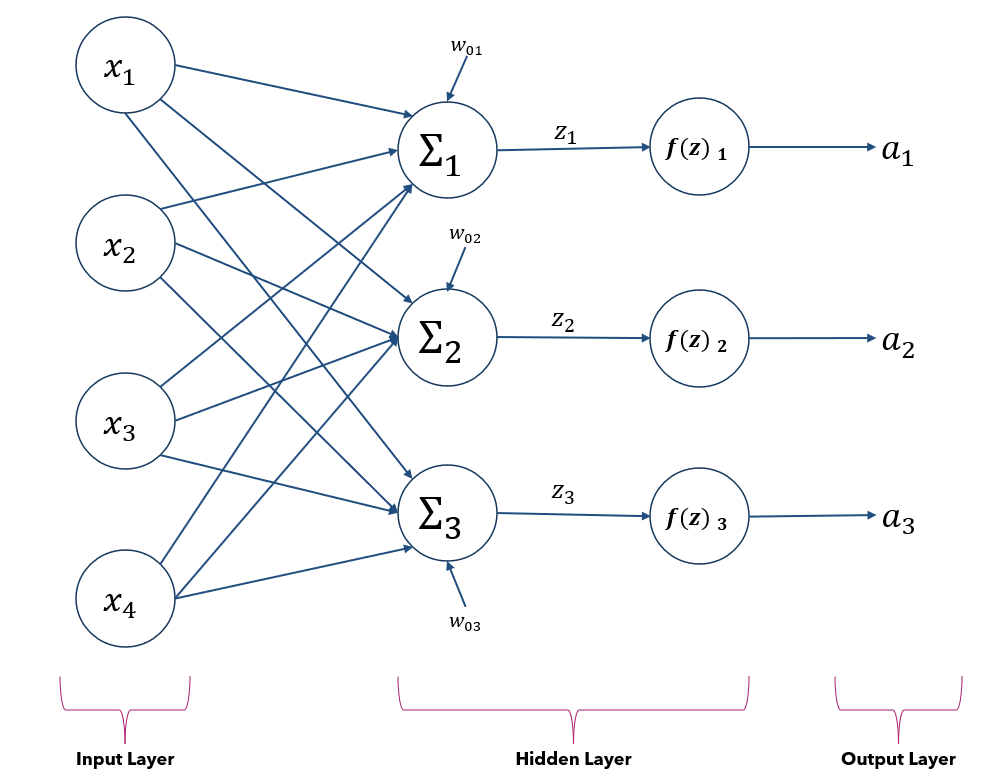

In [9]:
from IPython.display import Image
Image("notebook_mlp2_classifier.png", width=500)

Define an activation function: Sigmoid

In [10]:
# Sigmoid Function
def sigmoid(z):
    output = 1 / (1 + np.exp(-z))
    return output

Final Test Accuracy: 0.816


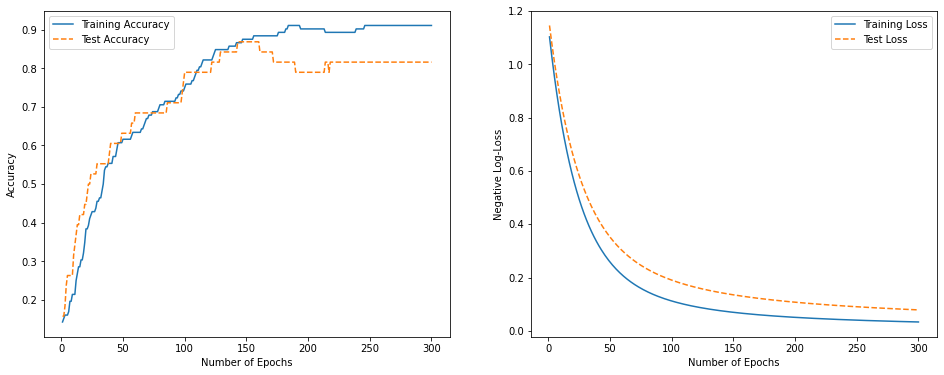

In [11]:
# Define hyperparameters
lr = 1e-3
epoch = 300

# Define initial weights
np.random.seed(0)
W = np.random.normal(size=(4, 3))
W0 = np.random.normal(size=(3, 1))

train_loss = list()
test_loss = list()

acc_train = list()
acc_test = list()

for t in range(epoch):
    
    epoch_loss_train = 0
    epoch_loss_test = 0
    
    pred_list_train = list()
    pred_list_test = list()
    
    # 1) Training
    for x_t, r_t in zip(X_train_scaled, y_train):
        
        x_t = np.reshape(x_t, (4, 1))
        x1, x2, x3, x4 = x_t[0, 0], x_t[1, 0], x_t[2, 0], x_t[3,0]
        # Assign the occurrence probability of each class according to r_t
        target_probs = [0, 0, 0]
        target_probs[r_t] = 1
        r1, r2, r3 = target_probs[0], target_probs[1], target_probs[2]        
        
        # 1.1) Forward Pass
        z_train = (np.dot(W.T, x_t) + W0)[:, 0]
        z1, z2, z3 = z_train[0], z_train[1], z_train[2]
        a_train = sigmoid(z_train)
        a1, a2, a3 = a_train[0], a_train[1], a_train[2]
        # Predict the class with the highest probability
        pred = np.argmax(a_train)
        pred_list_train.append(pred)
        loss = -(r1*np.log(a1) + r2*np.log(a2) + r3*np.log(a3))
        epoch_loss_train += loss
        
        # 1.2) Backpropagation
        delta_w1 = lr * x1 * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)])
        delta_w2 = lr * x2 * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)])
        delta_w3 = lr * x3 * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)])
        delta_w4 = lr * x4 * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)])
        delta_W = np.array([delta_w1, delta_w2, delta_w3, delta_w4]).reshape(4, 3)   

        delta_W0 = lr * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)]).reshape(3, 1)
        
        # 1.3) Update the parameters
        W = W - delta_W
        W0 = W0 - delta_W0
        
    # Obtaining results for each epoch    
    mean_loss_train = epoch_loss_train / y_train.shape[0]
    train_loss.append(mean_loss_train)
    training_accuracy = np.sum(y_train==pred_list_train) / y_train.shape[0]
    acc_train.append(training_accuracy)
    
    # 2) Testing
    for x_val, r_val in zip(X_test_scaled, y_test):
        
        x_val = np.reshape(x_val, (4, 1))
        x1, x2, x3, x4 = x_val[0, 0], x_val[1, 0], x_val[2, 0], x_val[3,0]
        # Assign the occurrence probability of each class according to r_t
        target_probs = [0, 0, 0]
        target_probs[r_val] = 1
        r1, r2, r3 = target_probs[0], target_probs[1], target_probs[2]        
        
        # Forward Pass (only)
        z_test = (np.dot(W.T, x_val) + W0)[:, 0]
        z1, z2, z3 = z_test[0], z_test[1], z_test[2]
        a_test = sigmoid(z_test)
        a1, a2, a3 = a_test[0], a_test[1], a_test[2]
        # Predict the class with the highest probability
        pred = np.argmax(a_test)
        pred_list_test.append(pred)
        loss = -(r1*np.log(a1) + r2*np.log(a2) + r3*np.log(a3))
        epoch_loss_test += loss
        
    # Obtaining results for each epoch    
    mean_loss_test = epoch_loss_test / y_test.shape[0]
    test_loss.append(mean_loss_test)
    test_accuracy = np.sum(y_test==pred_list_test) / y_test.shape[0]
    acc_test.append(test_accuracy)
    
# Print the final test accuracy
print(f"Final Test Accuracy: {acc_test[-1]:.3f}")

# Result visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epoch_list = np.arange(1, epoch+1)
# 1) Accuracy vs. Epoch
ax1.plot(epoch_list, acc_train, label="Training Accuracy")
ax1.plot(epoch_list, acc_test, label="Test Accuracy", linestyle="--")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()
# 2) Loss vs. Epoch
ax2.plot(epoch_list, train_loss, label="Training Loss")
ax2.plot(epoch_list, test_loss, label="Test Loss", linestyle="--")
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Negative Log-Loss")
ax2.legend()

plt.show()

We can see that the test accuracy stopped improving after 150 iterations. Our model is inclined to be overtrained after the 150th epoch, even though detailed hyperparameter tuning is needed. We will now train our model using the optimal number of epochs and publish the classification results accordingly.

# Classification Evaluation Metrics

Train the model using the optimal hyperparameters: **learning_rate=1e-3, epoch=150.**

In [12]:
# Define hyperparameters
lr = 1e-3
epoch = 150

# Define initial weights
np.random.seed(0)
W = np.random.normal(size=(4, 3))
W0 = np.random.normal(size=(3, 1))

for t in range(epoch):
    
    # 1) Training
    for x_t, r_t in zip(X_train_scaled, y_train):
        
        x_t = np.reshape(x_t, (4, 1))
        x1, x2, x3, x4 = x_t[0, 0], x_t[1, 0], x_t[2, 0], x_t[3,0]
        # Assign the occurrence probability of each class according to r_t
        target_probs = [0, 0, 0]
        target_probs[r_t] = 1
        r1, r2, r3 = target_probs[0], target_probs[1], target_probs[2]        
        
        # 1.1) Forward Pass
        z_train = (np.dot(W.T, x_t) + W0)[:, 0]
        z1, z2, z3 = z_train[0], z_train[1], z_train[2]
        a_train = sigmoid(z_train)
        a1, a2, a3 = a_train[0], a_train[1], a_train[2]
        
        # 1.2) Backpropagation
        delta_w1 = lr * x1 * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)])
        delta_w2 = lr * x2 * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)])
        delta_w3 = lr * x3 * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)])
        delta_w4 = lr * x4 * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)])
        delta_W = np.array([delta_w1, delta_w2, delta_w3, delta_w4]).reshape(4, 3)   

        delta_W0 = lr * np.array([r1*(a1-1), r2*(a2-1), r3*(a3-1)]).reshape(3, 1)
        
        # 1.3) Update the parameters
        W = W - delta_W
        W0 = W0 - delta_W0
        
# Test the model with final weights
predictions = list()
# 2) Testing
for x_val, r_val in zip(X_test_scaled, y_test):
        
    x_val = np.reshape(x_val, (4, 1))     

    # Forward Pass (only)
    z_test = (np.dot(W.T, x_val) + W0)[:, 0]
    z1, z2, z3 = z_test[0], z_test[1], z_test[2]
    a_test = sigmoid(z_test)
    a1, a2, a3 = a_test[0], a_test[1], a_test[2]
    # Predict the class with the highest probability
    pred = np.argmax(a_test)
    predictions.append(pred)

Check the accuracy:

In [13]:
acc = np.sum(y_test==predictions) / y_test.shape[0]
print(f"Final Accuracy: {acc:.3f}")

Final Accuracy: 0.868


Import the necessary libraries to evaluate the classification results

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [15]:
# Observe the classificaiton results
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.90      0.69      0.78        13
           2       0.87      1.00      0.93        13

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.86        38
weighted avg       0.87      0.87      0.86        38



Display the confusion matrix

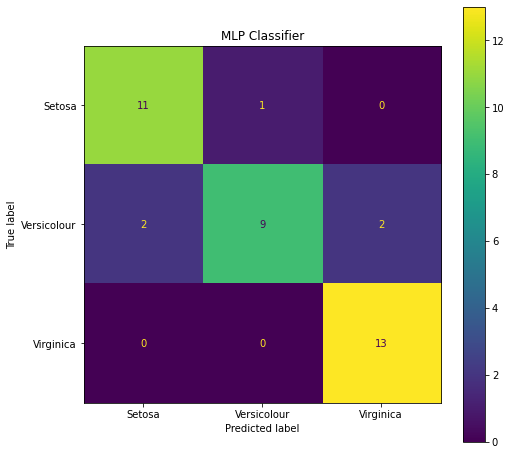

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
transaction = ["Setosa", "Versicolour", "Virginica"]
cm = confusion_matrix(y_test, predictions, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=transaction)
disp.plot(ax=ax, cmap="viridis")
plt.title("MLP Classifier")
plt.show()

**Discussion:** We made zero (0) misclassification for Iris-Virginica, four (4) for Iris-Versicolour, and one (1) for Iris-Setosa. In total, we made five (five) misclassification over 38 instances. The results are satisfactory. However, better accuracy can be achieved with more detailed hyperparameter tuning. In the next notebook, we will dive deep into hyperparameter tuning using an existing machine learning library and try to boost classification performance.

# END